<a href="https://colab.research.google.com/github/jaaaamj0711/kaggle_study/blob/master/Clubhouse%20/clubhouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 사용을 위한 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [3]:
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

In [ ]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

In [5]:
connection = sqlite3.connect("/content/drive/MyDrive/Clubhouse_Dataset_v1.db")

data = pd.read_sql("select * from user", con=connection)
data  = data.replace(to_replace ='null',value =np.nan)
data.head(5)

,user_id,name,photo_url,username,twitter,instagram,num_followers,num_following,time_created,invited_by_user_profile
0,4,Rohan Seth,https://clubhouseprod.s3.amazonaws.com:443/4_b...,rohan,rohanseth,NaN,4187268,599,2020-03-17T07:51:28.085566+00:00,NaN
1,5,Paul Davison,https://clubhouseprod.s3.amazonaws.com:443/5_e...,paul,pdavison,NaN,3718334,1861,2020-03-17T14:36:19.468976+00:00,NaN
2,8,Johnny Appleseed,None,apple1,NaN,srt_tester_9,20,81,2020-03-19T19:47:00.323603+00:00,NaN
3,10,DK 🖍,https://clubhouseprod.s3.amazonaws.com:443/10_...,dk,dksf,NaN,49538,173,2020-03-19T23:38:52.574777+00:00,NaN
4,12,Jonathan Gheller,https://clubhouseprod.s3.amazonaws.com:443/12_...,jonathan,jgheller,NaN,21250,81,2020-03-20T02:30:22.188084+00:00,NaN


In [6]:
data['time_created'] = pd.to_datetime(data["time_created"]).apply(lambda x: x.date())

In [7]:
time_group = data.groupby('time_created', as_index=False)
time_group = time_group.agg(user_count = ('time_created', 'count'))

In [8]:
plt.style.use(['bmh'])

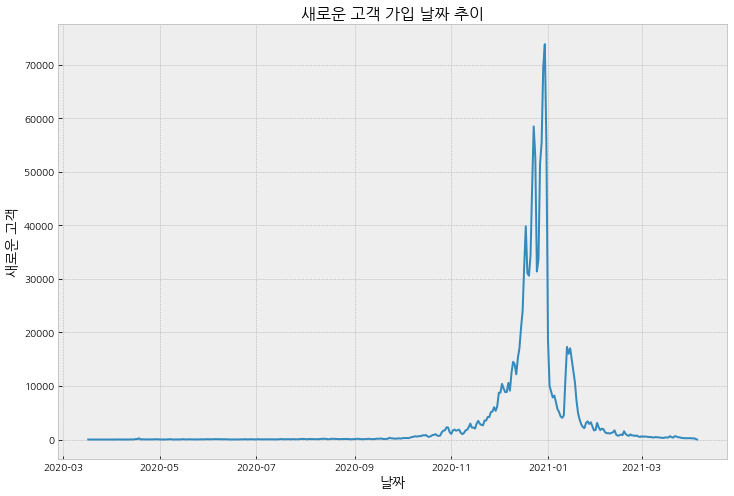

In [9]:
plt.figure(figsize=(12,8))
sns.lineplot(x=time_group['time_created'], y=time_group['user_count'])
plt.xlabel('날짜', fontsize=14)
plt.ylabel('새로운 고객', fontsize=14)
plt.title('새로운 고객 가입 날짜 추이', fontsize=16)
plt.show()

In [15]:
top = data.nlargest(20,['num_followers'])

In [17]:
import warnings
warnings.filterwarnings('ignore')

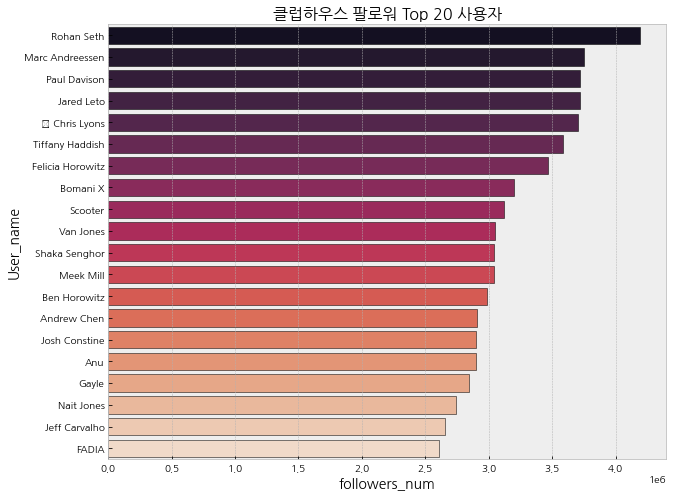

In [24]:
plt.figure(figsize=(10,8))
fol_plot = sns.barplot(x=top['num_followers'], y = top['name'], edgecolor=(0,0,0), palette='rocket')
plt.xlabel('followers_num', fontsize=14)
plt.ylabel('User_name', fontsize=14)

plt.title('클럽하우스 팔로워 Top 20 사용자', fontsize=16)
plt.show()

- 팔로워가 가장 많은 사람의 이름은 로한 세스(Rohan Seth)입니다. 로한 세스에 대해서 찾아보니 클럽하우스의 창시자였습니다.

